In [2]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression


(100, 1) (100,)


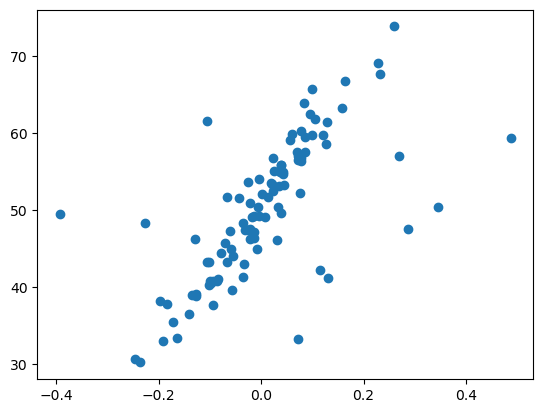

In [5]:
# create a regression dataset with outliers
from random import random
from random import randint
from random import seed
from sklearn.datasets import make_regression
from matplotlib import pyplot
 
# prepare the dataset
def get_dataset():
	X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
	# add some artificial outliers
	seed(1)
	for i in range(10):
		factor = randint(2, 4)
		if random() > 0.5:
			X[i] += factor * X.std()
		else:
			X[i] -= factor * X.std()
	return X, y
 
# load dataset
X, y = get_dataset()
# summarize shape
print(X.shape, y.shape)
# scatter plot of input vs output
pyplot.scatter(X, y)
pyplot.show()

In [6]:
# evaluate a model
def evaluate_model(X, y, model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return absolute(scores)